**Mounting** **Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install Kaggle

**Link kaggle account**

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "sivathmika"
os.environ['KAGGLE_KEY'] = "bc03641ea48d0affb86485afe7a072ba"


In [ ]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          16035        361  1.0              
imtkaggleteam/airplane-crashes                          Airplane Crashes 🛫                            564KB  2024-02-15 21:00:38            675         38  1.0              
bhavikjikadara/google-play-store-applications           Google Play Store Applications                328KB  2024-02-13 06:48:02           1192         36  1.0              
mikhail1681/walmart-sales                               Walmart Sales                                 122KB  2024-02-13 17:35:56  

**Creating a folder and
store zip file of the dataset**

In [ ]:
!kaggle datasets download -d ameymore/food-quality-assessment -p /content/datasets/

 59% 9.00M/15.2M [00:00<00:00, 17.5MB/s]
100% 15.2M/15.2M [00:00<00:00, 31.1MB/s]


Extracting Zip


In [ ]:
import zipfile

# Path to the downloaded zip file
zip_file_path = '/content/datasets/food-quality-assessment.zip'

# Directory to extract the contents of the zip file
extract_dir = '/content/datasets/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


covert  the Dataset xlsx to csv


In [ ]:
import pandas as pd

# Provide the path to your Excel files
xlsx_file_paths = ['/content/datasets/Data_Test.xlsx','/content/datasets/Data_Train.xlsx','/content/datasets/Sample_Submission.xlsx']

# Loop through each Excel file
for xlsx_file_path in xlsx_file_paths:
    # Read the Excel file into a DataFrame
    dataset = pd.read_excel(xlsx_file_path)

    # Extract the file name (without extension)
    file_name = xlsx_file_path.split('/')[-1].split('.')[0]

    # Define the CSV file path
    csv_file_path = f'/content/datasets/{file_name}.csv'

    # Convert and save the DataFrame to a CSV file
    dataset.to_csv(csv_file_path, index=False)



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/content/datasets/Data_Train.csv')

Droping Nan values

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

In [ ]:
dataset.isna().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108281 entries, 0 to 147442
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  108281 non-null  int64  
 1   Date                108281 non-null  object 
 2   LicenseNo           108281 non-null  int64  
 3   FacilityID          108281 non-null  int64  
 4   FacilityName        108281 non-null  int64  
 5   Type                108281 non-null  object 
 6   Street              108281 non-null  int64  
 7   City                108281 non-null  object 
 8   State               108281 non-null  object 
 9   LocationID          108281 non-null  float64
 10  Reason              108281 non-null  object 
 11  SectionViolations   108281 non-null  float64
 12  RiskLevel           108281 non-null  object 
 13  Geo_Loc             108281 non-null  object 
 14  Inspection_Results  108281 non-null  int64  
dtypes: float64(2), int64(6), object(7)

In [ ]:
dataset['Type'].fillna(dataset['Type'].mode()[0], inplace = True)
dataset['LocationID'].fillna(dataset['LocationID'].mode()[0], inplace=True)
dataset['SectionViolations'].fillna(dataset['SectionViolations'].mode()[0], inplace = True)


In [ ]:
dataset.isna().sum()


ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

In [ ]:
dataset.isnull().sum()


ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

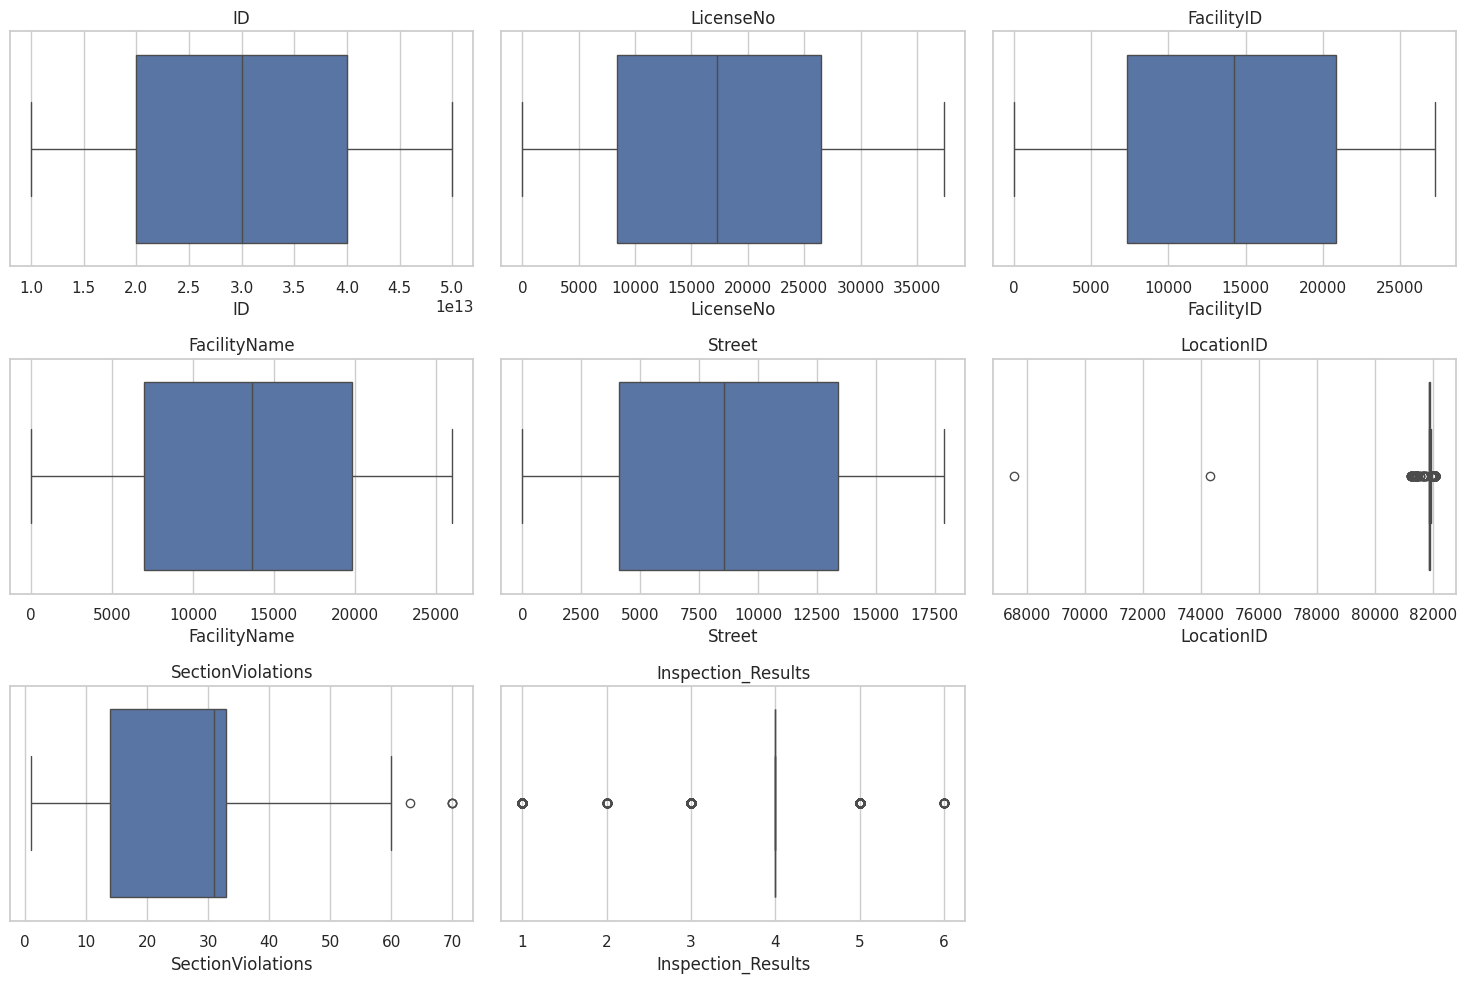

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(dataset.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=dataset[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
def handle_outliers(dataset):
    df_no_outliers = dataset.copy()

    for column in dataset.select_dtypes(include=['number']).columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update the DataFrame without outliers for the current column
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

    return df_no_outliers



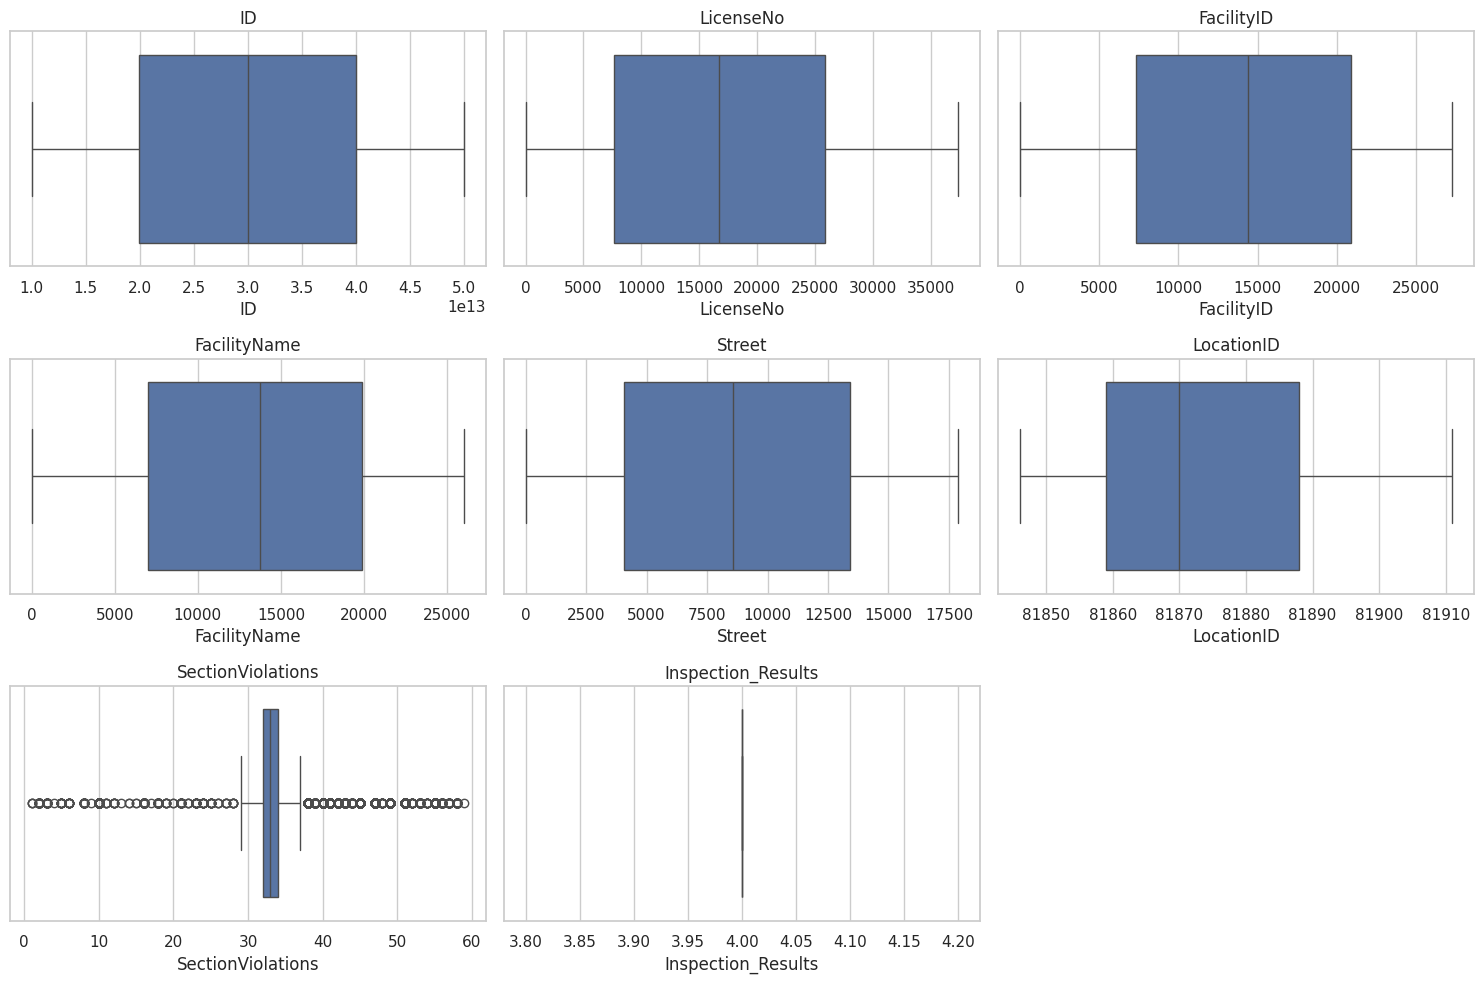

In [ ]:
dataset = handle_outliers(dataset)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, column in enumerate(dataset.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=dataset[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
dataset

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4
6,17640167351232,04-04-2011,9621,3791,3576,RESTAURANT,2133,id-11235901,id_1890134,81887.0,CANVASS RE-INSPECTION,32.0,High,locid8876,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147432,22317707931588,11-05-2017,2938,5944,5685,RESTAURANT,130,id-11235901,id_1890134,81867.0,CANVASS,33.0,High,locid10162,4
147434,20445320482526,30-05-2013,5588,26550,25324,RESTAURANT,11356,id-11235901,id_1890134,81870.0,CANVASS,30.0,High,locid14111,4
147435,11282139945113,16-11-2016,10983,18491,17662,BAKERY,11326,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid14000,4
147436,21161647203676,09-12-2013,17143,22155,21175,RESTAURANT,16667,id-11235901,id_1890134,81865.0,COMPLAINT,33.0,High,locid1677,4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Define categorical features to be encoded
categorical_features = ['Type','State', 'Reason', 'RiskLevel']

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    dataset[feature] = encoder.fit_transform(dataset[feature])


print(dataset.head())





               ID        Date  LicenseNo  FacilityID  FacilityName  Type  \
0  31103489027986  26-04-2010       4744        8123          7715   198   
1  10088999935915  21-06-2009       2973       12268         11664   123   
3  37157708563676  28-09-2015      20825       20007         19115   198   
4  47478049564374  09-12-2015       2136       16867         10409   198   
6  17640167351232  04-04-2011       9621        3791          3576   198   

   Street         City  State  LocationID  Reason  SectionViolations  \
0   15522  id-11235901      0     81876.0       0               33.0   
1    3057  id-11235901      0     81862.0       2               33.0   
3    3661  id-11235901      0     81859.0       1               31.0   
4    7876  id-11235901      0     81886.0       2               30.0   
6    2133  id-11235901      0     81887.0       1               32.0   

   RiskLevel     Geo_Loc  Inspection_Results  
0          0  locid16406                   4  
1          0    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = dataset.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dataset = dataset.drop(['Date','LocationID','ID','City','Street','Geo_Loc'], axis=1)

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset['Inspection_Results']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(dataset.head())

   LicenseNo  FacilityID  FacilityName  Type  State  Reason  \
0       4744        8123          7715   198      0       0   
1       2973       12268         11664   123      0       2   
3      20825       20007         19115   198      0       1   
4       2136       16867         10409   198      0       2   
6       9621        3791          3576   198      0       1   

   SectionViolations  RiskLevel  Inspection_Results  
0               33.0          0                   4  
1               33.0          0                   4  
3               31.0          2                   4  
4               30.0          0                   4  
6               32.0          0                   4  


In [ ]:
from sklearn.preprocessing import StandardScaler
# Select the numerical columns to scale

# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the scaler on the selected columns and transform them
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 0.15342192,  0.77046127,  0.77640364, ..., -0.59995132,
         5.02515563, -0.5381995 ],
       [-0.66151229,  0.68577864,  0.6912968 , ..., -0.59995132,
        -0.77871396, -0.5381995 ],
       [ 1.61648154, -0.50659914,  0.7714053 , ..., -0.59995132,
        -0.3144044 , -0.5381995 ],
       ...,
       [-0.60739766,  1.21330768,  1.21504161, ..., -0.59995132,
        -0.08224961, -0.5381995 ],
       [-0.20019845, -1.23798423, -1.23941274, ..., -0.59995132,
        -0.08224961, -0.5381995 ],
       [-0.81269392,  1.20417019,  1.20734147, ...,  4.29175474,
        -0.54655918, -0.5381995 ]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier(n_estimators = 100, random_state  = 42)
# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

y_pred_tr = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_tr)
print("TrainAccuracy:", accuracy)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("TestAccuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

TrainAccuracy: 1.0
TestAccuracy: 1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00     12210

    accuracy                           1.00     12210
   macro avg       1.00      1.00      1.00     12210
weighted avg       1.00      1.00      1.00     12210

Confusion Matrix:
[[12210]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define feature columns
# feature_columns = ['LicenseNo', 'FacilityID', 'Type', 'State', 'Reason', 'SectionViolations', 'RiskLevel']

# X = dataset[feature_columns]
y = dataset['Inspection_Results']


k_values = [3, 5, 7]  # Example values for k
best_accuracy = 0
best_k = None

# Step 4: Train the Model
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"Train Accuracy for k={k}: {train_accuracy}")

    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy for k={k}: {test_accuracy}")

    # Keep track of the best performing model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = k

# Step 6: Hyperparameter Tuning (Optional)
print(f"Best performing k: {best_k}")



Train Accuracy for k=3: 1.0
Test Accuracy for k=3: 1.0
Train Accuracy for k=5: 1.0
Test Accuracy for k=5: 1.0
Train Accuracy for k=7: 1.0
Test Accuracy for k=7: 1.0
Best performing k: 3


In [ ]:
import joblib
joblib.dump(encoder,'encoder.joblib')

['encoder.joblib']

In [ ]:
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

In [ ]:
joblib.dump(model,'RFS_model.joblib')

['RFS_model.joblib']

In [ ]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
